In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree

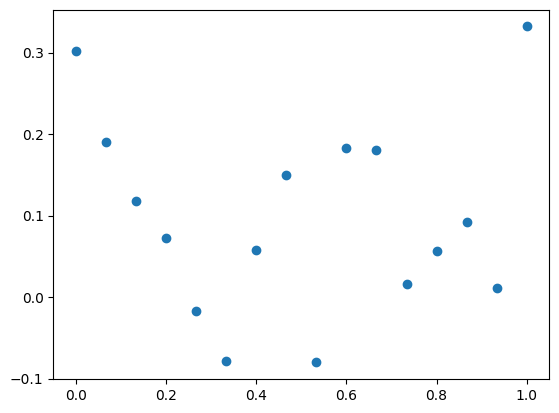

In [164]:
X = np.linspace(0,1,16)
y = (X -0.5)**2 + np.random.normal(loc=0.0, scale=0.1, size=16) # +以降はノイズ

plt.scatter(X,y)
plt.show()

In [165]:
print(X)
print(X.reshape(-1,1))

[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]
[[0.        ]
 [0.06666667]
 [0.13333333]
 [0.2       ]
 [0.26666667]
 [0.33333333]
 [0.4       ]
 [0.46666667]
 [0.53333333]
 [0.6       ]
 [0.66666667]
 [0.73333333]
 [0.8       ]
 [0.86666667]
 [0.93333333]
 [1.        ]]


In [166]:
model = DecisionTreeRegressor(max_leaf_nodes=5)
model.fit(X.reshape(-1,1),y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [167]:
pred = model.predict(X.reshape(-1,1))
pred

array([0.24648624, 0.24648624, 0.03156369, 0.03156369, 0.03156369,
       0.03156369, 0.03156369, 0.03156369, 0.03156369, 0.18198351,
       0.18198351, 0.04394777, 0.04394777, 0.04394777, 0.04394777,
       0.33193097])

In [168]:
test = np.linspace(0,1,1000)
pred = model.predict(test.reshape(-1,1))


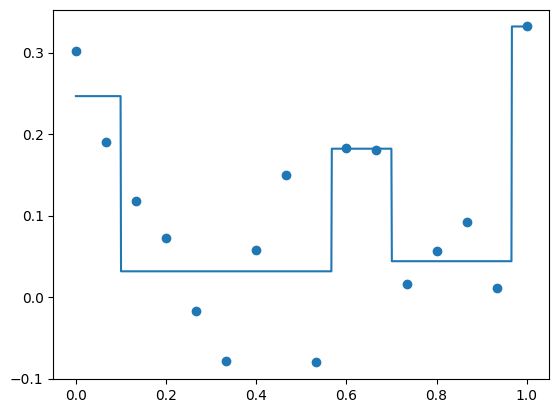

In [169]:
plt.scatter(X,y)
plt.plot(test,pred)
plt.show()

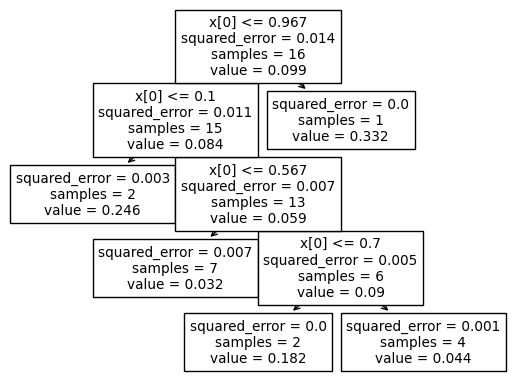

In [170]:
plot_tree(model)
plt.show()

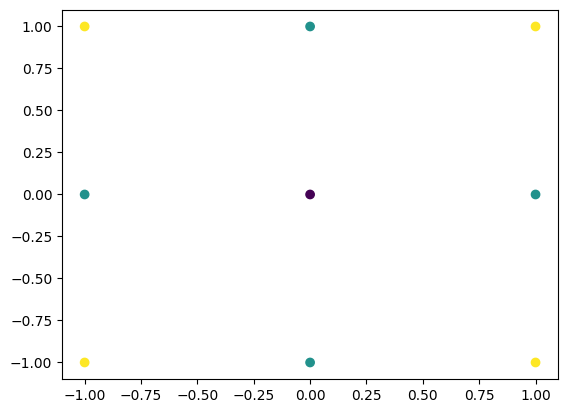

In [171]:
#2変数データの作成
axisX = np.array([-1,0,1])
xx,yy = np.meshgrid(axisX,axisX)

X_train = np.c_[xx.ravel(),yy.ravel()]
y_train = X_train[:,0]**2 + X_train[:,1]**2

plt.scatter(x = X_train[:,0],y = X_train[:,1],c = y_train)
plt.show()

In [172]:
model = DecisionTreeRegressor(max_leaf_nodes=5,random_state=15)
model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,5
,min_impurity_decrease,0.0
,ccp_alpha,0.0


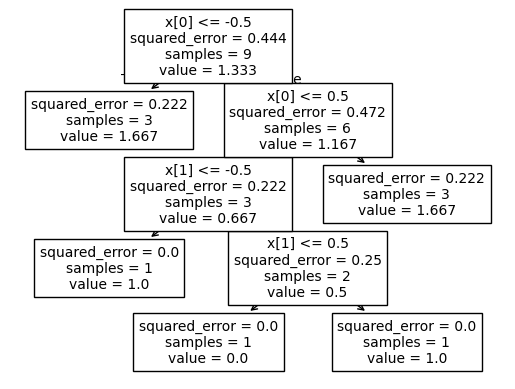

In [173]:
plot_tree(model)
plt.show()

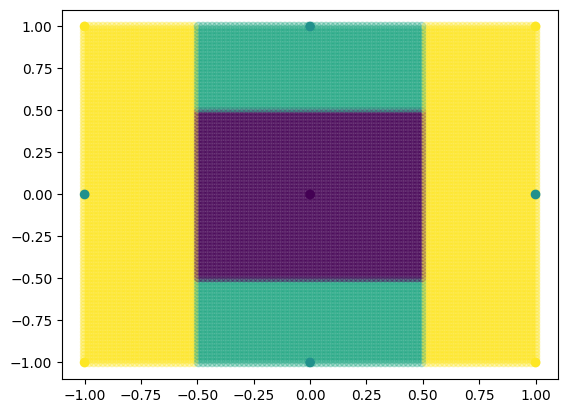

In [174]:
axis_test = np.linspace(-1,1,100)
xx,yy = np.meshgrid(axis_test,axis_test)
X_test = np.c_[xx.ravel(),yy.ravel()]

pred = model.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=pred.ravel(),alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [193]:
model.feature_importances_

array([0.75, 0.25])

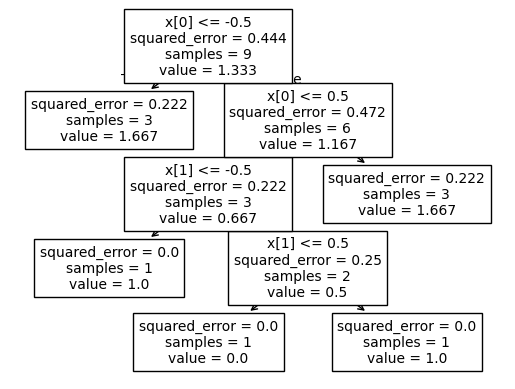

In [194]:
plot_tree(model)
plt.show()

In [178]:
#squared error
Squared_error = model.tree_.impurity
Squared_error

array([0.44444444, 0.22222222, 0.47222222, 0.22222222, 0.22222222,
       0.        , 0.25      , 0.        , 0.        ])

In [179]:
node_samples = model.tree_.n_node_samples
node_samples

array([9, 3, 6, 3, 3, 1, 2, 1, 1], dtype=int64)

In [181]:
sse = Squared_error * node_samples
sse

array([4.        , 0.66666667, 2.83333333, 0.66666667, 0.66666667,
       0.        , 0.5       , 0.        , 0.        ])

In [ ]:
sse[0] - (sse[1] + sse[2]) #x[0] 9->6,3

np.float64(0.5000000000000049)

In [ ]:
sse[2] - (sse[3] + sse[4]) #x[0] 6->3,3 

np.float64(1.4999999999999991)

In [ ]:
sse[3] - (sse[5] + sse[6]) #x[1] 3->2,1

np.float64(0.16666666666666663)

In [ ]:
sse[6] - (sse[7] + sse[8]) #x[1] 2->1,1

np.float64(0.5)

In [191]:
fi = np.array([0.5+1.5,0.16+0.5])
fi

array([2.  , 0.66])

In [192]:
# 正規化
fi/fi.sum()

array([0.7518797, 0.2481203])

In [ ]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

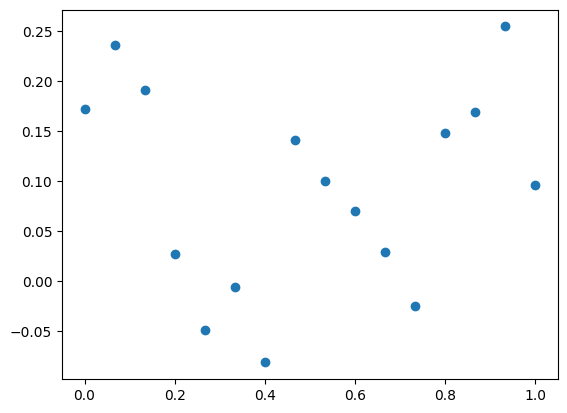

In [201]:
X = np.linspace(0,1,16)
y = (X -0.5)**2 + np.random.normal(loc=0.0, scale=0.1, size=16) # +以降はノイズ

plt.scatter(X,y)
plt.show()

In [202]:
model = RandomForestRegressor(n_estimators=100,max_leaf_nodes=5)
model.fit(X.reshape(-1,1),y)
pred = model.predict(test.reshape(-1,1))

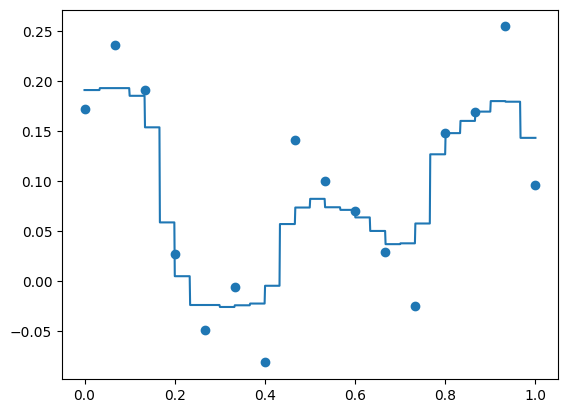

In [203]:
plt.plot(test,pred)
plt.scatter(X,y)
plt.show()

In [205]:
data = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_train.csv")
data

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1
...,...,...,...,...,...,...,...
95,DC阿佐ヶ谷,7.3,20.58,2,14,1,0
96,ＪＲ中央線 西荻窪駅 地下1地上3階建 築29年,6.9,20.83,29,22,0,1
97,ＪＲ中央線 荻窪駅 4階建 新築,10.1,25.31,0,10,1,1
98,コンフォートテラス荻窪,5.8,12.64,5,12,1,1


In [206]:
X = data[data.columns[2:]].values
y = data["value"].values

In [208]:
model_tree = DecisionTreeRegressor(max_leaf_nodes=8)
model_tree.fit(X,y)
pred = model_tree.predict(X)

In [210]:
from sklearn.metrics import r2_score
r2_score(y,pred)


0.9126497417013817

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(model_tree,feature_names=data.columns[2:])
plt.show()

NameError: name 'model_tree' is not defined

<BarContainer object of 5 artists>

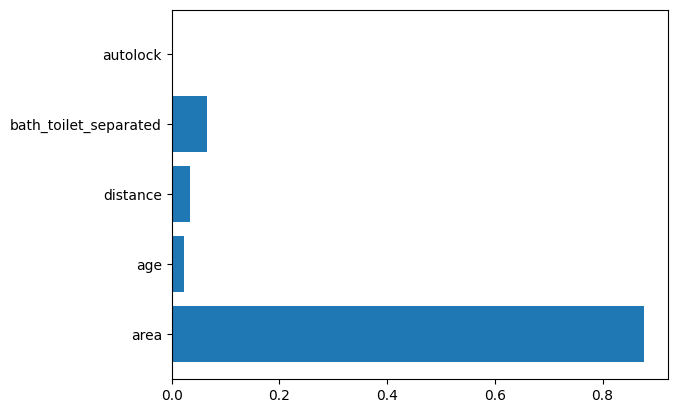

In [212]:
plt.barh(data.columns[2:],model_tree.feature_importances_)

In [218]:
model_rf = RandomForestRegressor(n_estimators=100, max_leaf_nodes=6)
X = data[data.columns[2:]].values
y = data["value"].values
model_rf.fit(X,y)
pred = model_rf.predict(X)



In [219]:
r2_score(y,pred)

0.916109547252397

<BarContainer object of 5 artists>

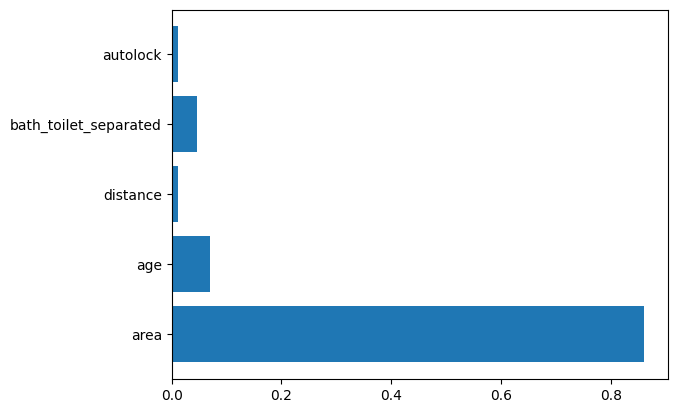

In [221]:
plt.barh(data.columns[2:],model_rf.feature_importances_)

## ここから練習

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [4]:
df = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_train.csv")
df.head()

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1


In [6]:
df.columns
df.dtypes

name                      object
value                    float64
area                     float64
age                        int64
distance                   int64
bath_toilet_separated      int64
autolock                   int64
dtype: object

In [9]:
X_train = df.iloc[:,2:].values
y_train = df["value"].values

Decision_tree = DecisionTreeRegressor(max_leaf_nodes=6)
Decision_tree.fit(X_train,y_train)
pred = Decision_tree.predict(X_train)


In [11]:
#決定係数(1-残差平方和/全変動)
#R2 = 1 - 予測と実数値のずれ/平均値と実数値のずれ(元データのばらつき)
from sklearn.metrics import r2_score
r2_score(y_train,pred)
#分類器の単純な性能を示すのに便利

0.8729079157674751

In [14]:
# MSE(平均二乗誤差)
from sklearn.metrics import mean_squared_error 
mse =  mean_squared_error(y_train,pred)
RMSE = np.sqrt(mse)
print(mse)
print(RMSE) #平均絶対誤差 誤差がどれくらいかを直感的に伝えてくれる指標
            #今回は8千円くらいずれてるってこと！！！

0.6567972642857144
0.8104302957600452


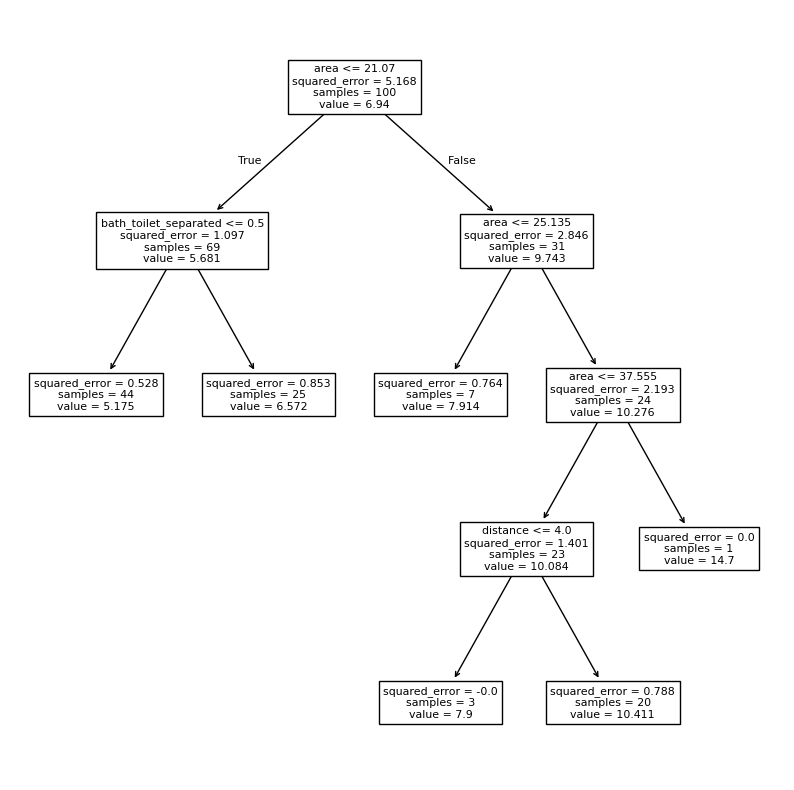

In [16]:
plt.figure(figsize=(10,10))
plot_tree(Decision_tree,feature_names=df.columns[2:])
plt.show()

- squared_error は分散
- value は平均

In [17]:
Decision_tree.feature_importances_

array([0.8945547 , 0.        , 0.03647611, 0.06896919, 0.        ])

<BarContainer object of 5 artists>

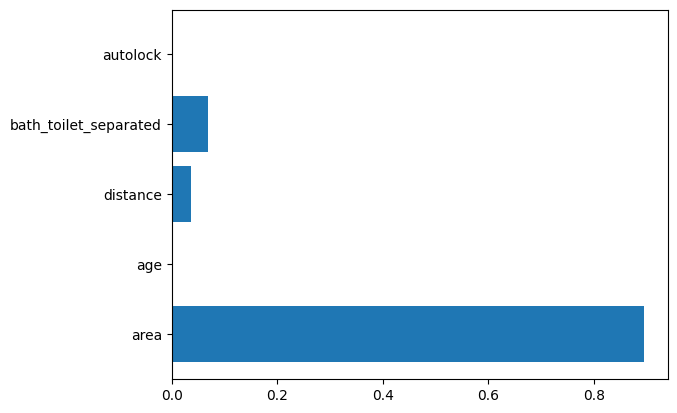

In [19]:
#横向き棒グラフの可視化
plt.barh(df.columns[2:],Decision_tree.feature_importances_)
#plt.barh(y(縦軸), width(数値データ), height=0.8, left=None, align='center', **kwargs)


In [25]:
df = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/Mansion1.csv")
df

,distance,rent,floorPlan,space,direction,age
0,B,68000,1K,19,西,12
1,B,68000,1K,19,南,12
2,B,69000,1K,19,北西,14
3,B,70000,1K,19,南,14
4,B,72000,1K,15,南,9
...,...,...,...,...,...,...
135,B,145000,1DK,40,南,8
136,B,145000,1SLDK,54,南東,28
137,A,148000,1LDK,42,南東,13
138,A,148000,1LDK,42,南,13


In [39]:
df.sample(n=50)

,distance,rent,floorPlan,space,direction,age
129,1,135000,2DK,42,南西,23
99,1,110000,1DK,30,南東,9
108,0,115000,1DK,32,南,15
125,1,131000,2DK,46,東,23
111,0,120000,1K,35,南,10
91,1,104000,1K,27,北西,8
17,1,82000,1K,20,南東,9
78,1,99500,1K,26,南西,0
79,0,100000,1K,26,東,4
9,1,79000,1K,22,南,10


In [21]:
df.dtypes

distance     object
rent          int64
floorPlan    object
space         int64
direction    object
age           int64
dtype: object

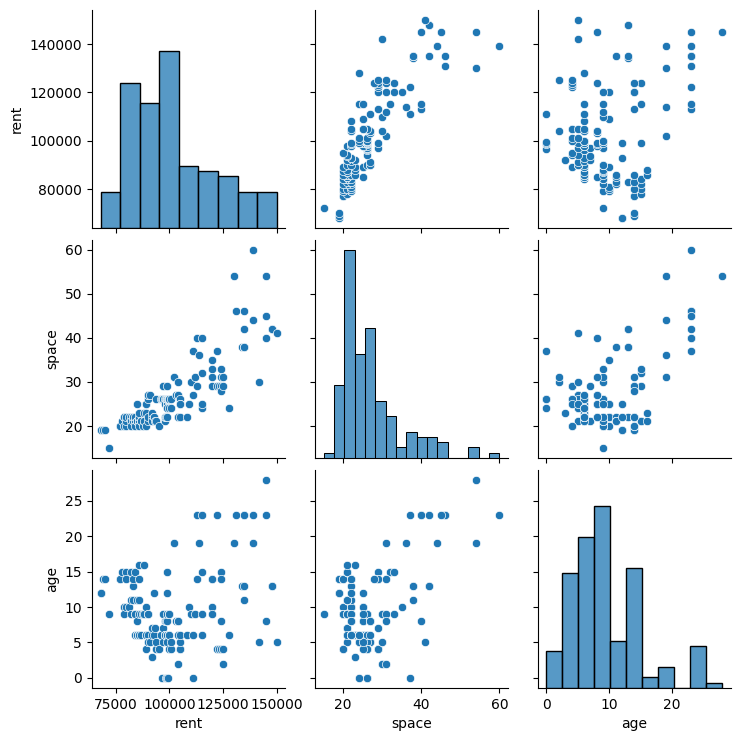

In [22]:
sns.pairplot(data=df)

In [23]:
df["distance"].value_counts()

distance
B    71
A    69
Name: count, dtype: int64

In [27]:
df["distance"][df["distance"] == "A"] = 0
df["distance"][df["distance"] == "B"] = 1

df

/tmp/ipykernel_6179/3044616377.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["distance"][df["distance"] == "A"] = 0
/tmp/ipykernel_6179/3044616377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,distance,rent,floorPlan,space,direction,age
0,1,68000,1K,19,西,12
1,1,68000,1K,19,南,12
2,1,69000,1K,19,北西,14
3,1,70000,1K,19,南,14
4,1,72000,1K,15,南,9
...,...,...,...,...,...,...
135,1,145000,1DK,40,南,8
136,1,145000,1SLDK,54,南東,28
137,0,148000,1LDK,42,南東,13
138,0,148000,1LDK,42,南,13


In [55]:
X = df[["distance","space","age"]].values
y = df["rent"].values


Decision_tree2 = DecisionTreeRegressor(max_leaf_nodes=5)
Decision_tree2.fit(X,y)
pred = Decision_tree2.predict(X)


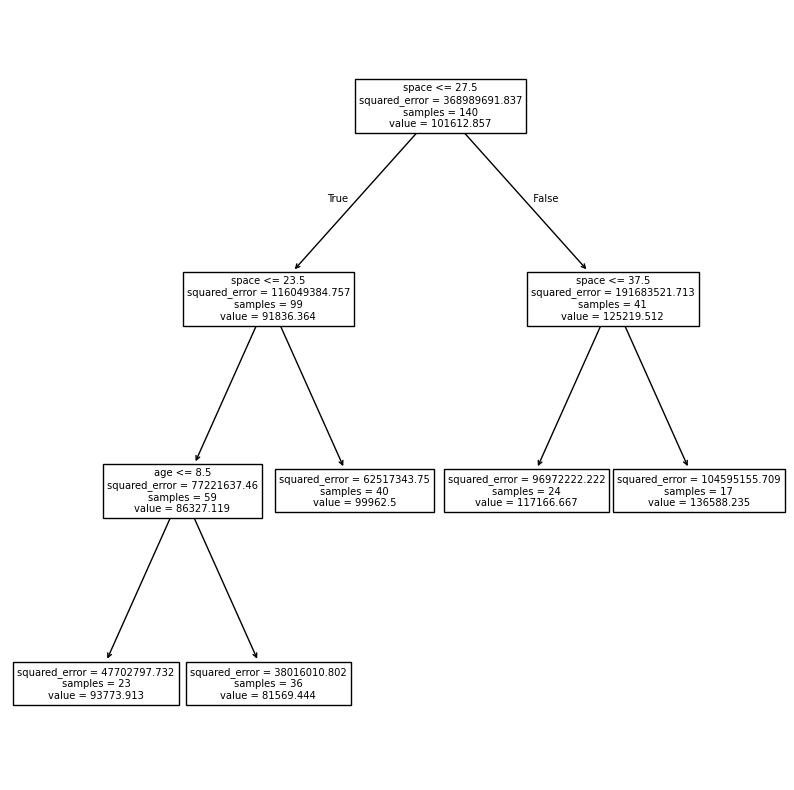

In [59]:
plt.figure(figsize=(10,10))
plot_tree(Decision_tree2,feature_names=["distance","space","age"])
plt.show()

In [60]:
from sklearn.metrics import r2_score
print(f"決定係数:{r2_score(y,pred)}")
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,pred)
print(f"MSE:{mean_squared_error(y,pred)}")
print(f"RMSE:{np.sqrt(MSE)}")

決定係数:0.8243875551499701
MSE:64799181.90790808
RMSE:8049.793904685267


<BarContainer object of 3 artists>

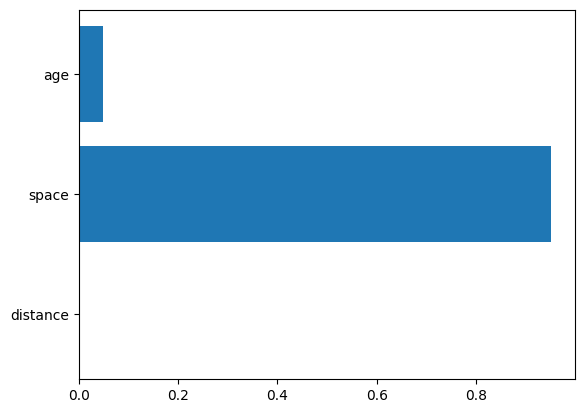

In [61]:
plt.barh(["distance","space","age"],Decision_tree2.feature_importances_)

In [62]:
from sklearn.ensemble import RandomForestClassifier
X = df[["distance","space","age"]].values
y = df["rent"].values

Random_fr = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=6)
Random_fr.fit(X,y)
pred_fr = Random_fr.predict(X)



In [63]:
from sklearn.metrics import r2_score
print(f"決定係数:{r2_score(y,pred_fr)}")
from sklearn.metrics import mean_squared_error
print(f"MSE:{mean_squared_error(y,pred_fr)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y,pred_fr))}")


決定係数:0.819597360689502
MSE:66566714.28571428
RMSE:8158.842705047959


<BarContainer object of 3 artists>

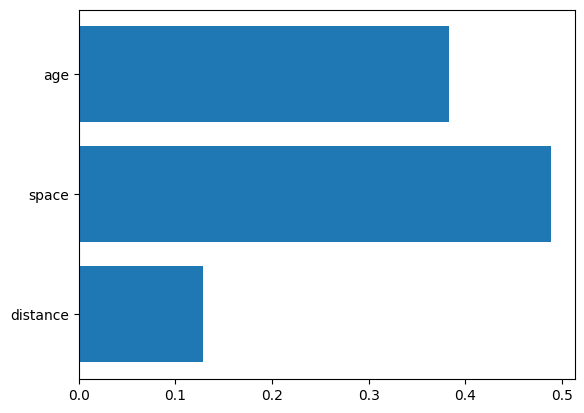

In [64]:
plt.barh(["distance","space","age"],Random_fr.feature_importances_)

# 再び練習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [2]:
df = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_train.csv")
df.head()

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1


In [3]:
df.columns

Index(['name', 'value', 'area', 'age', 'distance', 'bath_toilet_separated',
       'autolock'],
      dtype='object')

In [4]:
df.dtypes

name                      object
value                    float64
area                     float64
age                        int64
distance                   int64
bath_toilet_separated      int64
autolock                   int64
dtype: object

In [5]:
X_train = df.iloc[:,2:].values
y_train = df["value"].values

In [6]:
Decision_tree = DecisionTreeRegressor(max_leaf_nodes=6)
Decision_tree.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,6
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
y_pred = Decision_tree.predict(X_train)
y_pred

array([ 6.572     ,  5.175     ,  5.175     ,  6.572     ,  5.175     ,
        6.572     ,  7.9       ,  5.175     ,  5.175     ,  5.175     ,
        7.91428571,  6.572     ,  7.9       ,  5.175     ,  5.175     ,
        6.572     ,  5.175     ,  6.572     ,  6.572     ,  6.572     ,
        6.572     ,  5.175     ,  5.175     ,  5.175     ,  7.91428571,
        6.572     ,  6.572     , 10.4115    ,  5.175     ,  6.572     ,
        5.175     ,  5.175     , 10.4115    , 10.4115    ,  5.175     ,
        6.572     ,  5.175     , 10.4115    , 10.4115    ,  5.175     ,
       10.4115    , 14.7       , 10.4115    , 10.4115    ,  5.175     ,
       10.4115    ,  5.175     ,  5.175     ,  5.175     ,  5.175     ,
        5.175     ,  5.175     ,  5.175     ,  5.175     ,  5.175     ,
        7.91428571,  5.175     ,  5.175     ,  5.175     ,  7.91428571,
        5.175     ,  5.175     ,  5.175     ,  6.572     ,  6.572     ,
       10.4115    ,  5.175     ,  5.175     ,  6.572     ,  5.17

In [8]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.8729079157674751

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred)
print(np.sqrt(mean_squared_error(y_train,y_pred)))

0.8104302957600452


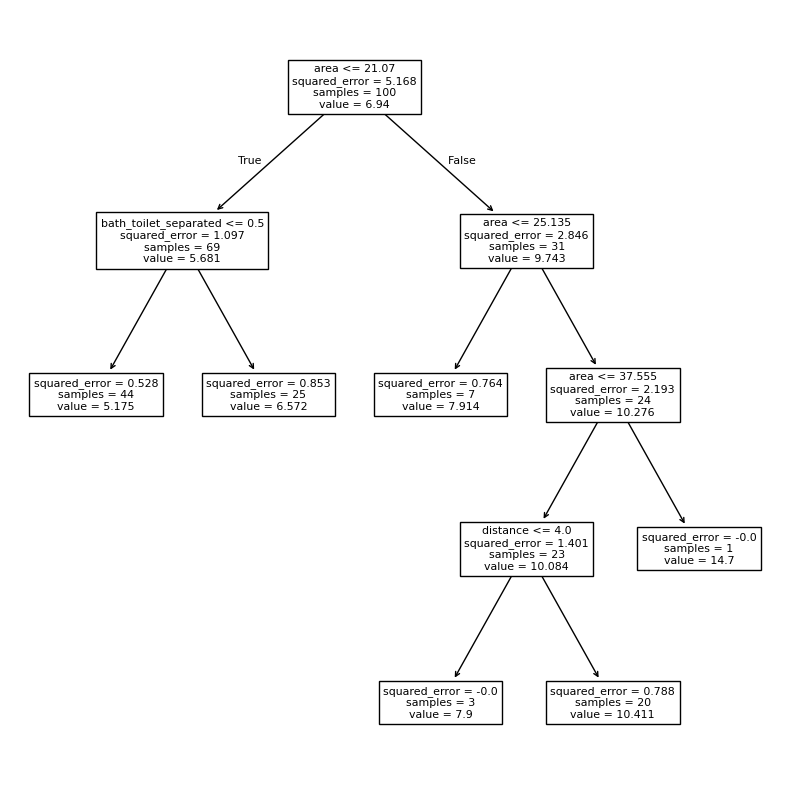

In [11]:
plt.figure(figsize=(10,10))
plot_tree(Decision_tree,feature_names=df.columns[2:])
plt.show()

In [12]:
Decision_tree.feature_importances_

array([0.8945547 , 0.        , 0.03647611, 0.06896919, 0.        ])

<BarContainer object of 5 artists>

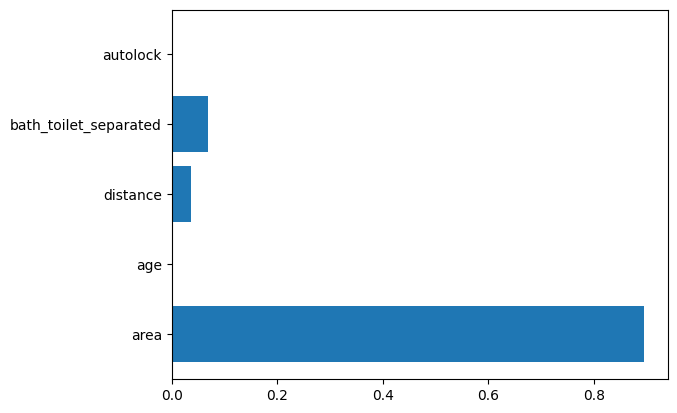

In [13]:
plt.barh(y=df.columns[2:],width=Decision_tree.feature_importances_)

### ランダムフォレスト

In [14]:
df = pd.read_csv("/home/haruk/workspace/ml-workspace-202507/math/math_data/Mansion1.csv")
df

,distance,rent,floorPlan,space,direction,age
0,B,68000,1K,19,西,12
1,B,68000,1K,19,南,12
2,B,69000,1K,19,北西,14
3,B,70000,1K,19,南,14
4,B,72000,1K,15,南,9
...,...,...,...,...,...,...
135,B,145000,1DK,40,南,8
136,B,145000,1SLDK,54,南東,28
137,A,148000,1LDK,42,南東,13
138,A,148000,1LDK,42,南,13


In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_leaf_nodes=6)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_train)
rf_pred

array([ 6.33846425,  4.89842847,  4.89842847,  6.33846425,  5.40247222,
        5.71709145,  8.24608676,  5.26545373,  5.34803834,  5.74075347,
        7.34480563,  6.9700256 ,  8.24608676,  4.89842847,  4.89842847,
        6.34162601,  5.26545373,  6.15188083,  6.28044813,  6.88214956,
        6.52297835,  5.1137844 ,  5.12239046,  4.42436468,  7.80923105,
        5.72508393,  6.91770434, 10.31818329,  5.66418721,  6.34162601,
        5.31502388,  5.26545373, 10.31818329, 10.31818329,  5.68920298,
        6.55979847,  5.31502388, 10.31818329, 11.19712557,  5.7255994 ,
       10.31818329, 12.66015638, 10.47106998, 10.31818329,  4.89842847,
       10.31818329,  5.25436867,  5.34803834,  5.40247222,  5.39184064,
        5.31502388,  5.25436867,  5.67243999,  5.25436867,  5.30616345,
        7.66312974,  5.82933262,  5.12239046,  5.77228426,  8.19637157,
        4.90703453,  5.36681866,  5.42399   ,  5.67328915,  6.72359235,
       10.31818329,  5.30616345,  5.81870104,  6.53745383,  5.26